<a href="https://colab.research.google.com/github/decoz/mlclass/blob/master/5_regression_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

# 분류(classification) 와 회귀분석

감독학습의 큰 두 줄기는 회귀와 분류이다. 회귀는 데이터의 상관관계를 기반으로 하여 출력 데이터의 연속적인 값을 예측하는 것이다. 이와는 달리 그 결과가 수치화되기 어려운 데이터가 존재한다. 예를 들어 여러 기상조건을 기준으로 비가 올것인가 안올것인가를 예측하는 문제들은 이를 수치화시키기 어렵다. 

이런 불연속적이고 유한적인 결과를 예측하는 문제를 분류(classification)이라고 표현한다. 



## 간단한 분류 문제 만들어보기

이제 간단한 분류 문제를 만들어보도록 하자. 먼저 0 부터 1 까지 10개의 x 를 고르게 분포시킨다. 



In [ ]:
x = np.linspace(0,1,10)
plt.plot(x,'o')

이번에는 0.5 를 기준으로 편차가 0.1 인 10 개의 값으로 이뤄진 정규랜덤 r을 만들 어보자

In [ ]:
r = np.random.normal(0.5,0.1,10)
plt.plot(r,'o')

이제 둘을 동시에 표현하면 다음과 같다. 

In [ ]:
plt.plot(x,'o')
plt.plot(r,'o')
plt.show()



이제 각각의 r 과 x 를 비교해서 x 가 더크면 1 , 아니면 0 인 배열 y를  만들어보자. np.where 을 이용하면 다음과 같이 간단히 둘의 비교 배열을 생성 가능하다. 

In [ ]:
y = np.where( x > r , 1, 0 )
print(y)


이제 y 를 x 에 대해 표현하면 다음과 같다. 

In [ ]:
plt.plot(x, y,'o')
plt.show()

이 y 값은 x에 대해 평균0.5, 편차 0.1 의 랜덤 값이 x 보다 작을 가능성이 불연속적인 결과로 나타난 경우를 보여준다. 

이제 이 전체 과정을 random의 편차를 키우면서 반복해보자. 


In [ ]:
# n : x 의 갯수
# e : 랜덤 표준편차 

n,e = 10, 0.2 

x = np.linspace(0,1, n)
r = np.random.normal(0.5, e, n)
y = np.where( x > r , 1, 0 )
plt.plot( x, y, '.') 
plt.show()


### 선형 회귀 분석을 적용시 문제점

위에서 생성된 x,y 에 우리가 배웠던 선형 회귀분석을 적용해보자 



In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression() 
regr.fit(x.reshape(-1,1),y)
plt.plot(x, y, 'o')
plt.plot(x, x * regr.coef_ + regr.intercept_)
plt.show()


과연 이것이 이 데이터를 올바르게 예측한다고 할 수 있을까? 무엇보다 결과가 0,1 범위를 넘어가는 순간 예측은 무의미해진다. 이를 예측하기 위해선 일반적인  y=wx+ϵ  형식의 함수는 적합하지 안다. 



<br><br>

---

# Logistic Regression

## 로지스틱 함수

이런 범주형 데이터를 해석할 수 있는 수학적 모델을 만들기 위해서 롹률로 해석하는 로지스틱 함수라는 것을 도입하였다.   

먼저 이러한 문제는 y 가 1일 확률이 되는 함수 P를 구하는 문제로 변환하였다. 


> $$ P(y=1) = f(x) $$

하지만 확률 P는 0과 1의 범위를 지니며 일반적인 $wx + \epsilon$ 은 $-\infty \approx  \infty $ 의 범위를 지닌다. 이 문제를 해결하기 위해 P 의 오즈비 라는 개념을 도입하는데 이는 발생확률 / 발생하지 안을 확률 을 의미한다. 

> $$ \frac{P}{1-P}  $$

이 오즈비 함수는 - 범위를 커버하지 못하기 때문에 이를 해결하기 위해 log 를 씌운 함수를 로짓 함수라고 한다.

>$$log(\frac{P}{1-P}) $$

이를 다시 fx 에 대해서 풀어보면 

>$$
\log(\frac{P}{1-P}) = f(x) \\
\frac{P}{1-P} = e^{f(x)} \\
\frac{1-P}{P} = \frac{1}{e^{f(x)}} \\
\frac{1}{P} - 1 = \frac{1}{e^{f(x)}} \\
\frac{1}{P} = e^{-f(x)} + 1 \\
P = \frac{1}{1 + e^{-f(x)}} \\
$$

이때 $f(x)$ 를 $wx+\epsilon$ 이라고 가정하면 

>$$ P = \frac{1}{1 + e^{-(wx+\epsilon)}} $$

이런 형태의 함수가 된다.  이를 로지스틱 함수 또는 시그모이드 함수라고도 부른다. 이 함수는 로지스틱 회귀만이 아니라 여러 분류 문제의 활성화 함수로 사용되므로 이 함수의 성질을 이해해두면 좋다. 먼저 이 함수를 시각화 하면 다음과 같은 형태가 된다. 









In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
x = np.linspace(-10,10,100)
y = 1 / ( 1 + np.exp(-1*x + 0 ) )
plt.plot(x,y)
plt.show() 

위의 함수는 w 는 1이고 e 는 0 인 시그모이드 함수로서 0을 기준으로 확률이 0.5를 넘게 되어있다.  




## 시그모이드(로지스틱) 함수 변형

이제 이 sigmoid 함수의 형태가 w 의 변화에 따라 어떻게 변하는지 살펴보자. 이를 위해서 먼저 3가지 값을 가지는 w 배열을 세로로 만든다. 


In [ ]:
w = np.array([-1,1,3]).reshape(-1,1)
print(w)

이 w 를 이용해 각각의 w 값마다 100개의 y 값을 가진 (3,100) 형태의 y값을 만든다. 

In [ ]:

y = 1 / ( 1 + np.exp(-1 * w * x + 0 ) )
print(y.shape)


plt.plot 을 이용해 한번에 여러개의 선을 그리기 위해서는 
```
[[y1,y2,y3]
 [y1,y2,y3] 
 ...
]
```
형태가 필요하지만 지금 y 는 
```
[[y1,y1,y1,... ]
 [y2,y2,y2,... ]
 [y3,y3,y3,... ]
]
```
형태로 존재한다. 이를 위의 형태로 바꾸려면 
```
y.swapaxes(0,1) 
```
로 축을 바꿔주어야 한다. 이를 이용해 3가지 w 값에 따른 y의 변화를 그리면 다음과 같다. 

In [ ]:
plt.plot(x,y.swapaxes(0,1)) 
plt.show()

결과적으로 w는 확률적 변화의 기울기를 표현하는 것을 느낄 수 있을 것이다. w 가 클수록 급격하게 확률밀도가 변한다. 

### <font color = 'red'> 연습 :  시그모이드 변형
이번에는 e 값의 변화에 따라 어떻게 변하는지 -3,0,3 의 3가지 e값을 사용해 변화를 그려보자. 
</font>

In [ ]:
# 연습문제의 코드를 여기에 작성하세요

---

# sklearn.LogisticRegression

로지스틱 회귀분석은 결국 문제에 최적화된  로지스틱 함수를 위한 $f(x)$ 얻는 과정을 의미한다.  이를 유도하는 정은 일반적인 선형회귀분석과 달리베르누이 공식을 사용한다고 하며 수학적인 지식을 요구하기 때문에 여기서 그것을 다루는 것은 생략한다. 

하지만 결과적으론 $f(x)$ 가 선형회귀와 마찬가지 계수 coef_ 와 상수항 intercept_로 이루어져 있기 때문에 이를 사용하는 것은 선형회귀와 거의 동일하다. 이제부터 선형회귀에서 했듯이 sklearn.LgositcRegression 을 사용하는 방법을 알아보도록 한다. 


## 모델생성

모델 생성은 LinearRegression 과 유사하게 sklearn.linear_model 로부터 LogisticRegression을 이용한다.  

In [ ]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()


## 간단한 로지스틱 문제 해결
이제 이를 이용해  위의 분류를 설명할 때 나왔던 문제를 풀어보도록 하겠다. 

In [ ]:
n,e = 10, 0.1

x = np.linspace(0,1, n)
r = np.random.normal(0.5, 0.1, n)
y = np.where( x > r , 1, 0 )
plt.plot( x, y, '.') 

plt.show()


이제 회귀분석을 수행한다. 선형회귀분석과 마찬가지로 1차원 x 는 2차원으로 형태 변환(reshape) 를 해준다. 

In [ ]:
regr.fit(x.reshape(-1,1),y)

분석 결과를 시각화 하기 전에 간단히 predict 를 사용해 x 의 예측결과를 볼 수 있다. 

In [ ]:
pre = regr.predict(x.reshape(-1,1))
print(pre)

시각화 시켜보면 다음과 같다. 

In [ ]:
plt.plot(x, pre, '.')
plt.show()

선형회귀 분석에서 했듯이 예측 정확도도 확인해보자. 

In [ ]:
print(regr.score(x.reshape(-1,1),y))

문제 자체가 랜덤성을 갖도록 되어있으므로 정확도가 개인차이가 매우 클 것이다. 

## 생성된 로지스틱 함수 그려보기 

이제 위의 모델에 생성된 함수를 그려보도록 하겠다. 먼저 coef_ 와 intercept_ 값을 확인해보자. 

In [ ]:
print(regr.coef_, regr.intercept_)


선형회귀와 마찬가지로 계수와 상수가 생성된 것이 출력된다.  이제 이것을 그래프화 시켜주어야 한다. 단 위의 계수와 상수항으로 만들어진 $f(x)$ 를 다시 시그모이드 함수에 넣어줘야 한다.  이 함수는 다음과 같이 표현할 수 있다. 

```
 1 / ( 1 + np.exp( -1 * regr.coef_ - regr.intercept_ ) ) 
```

단 coef 가 2차원 값이므로 이 결과인 py도 (1,n) 의 2차원 형태가 된다. 이것을 다시 
```
reshape(-1)
```
로 1차원으로 바꿔준후 그래프로 그리면 다음과 같다. 

In [ ]:

py = 1 / ( 1 + np.exp(-1 * regr.coef_ * x - regr.intercept_ ) )
plt.plot(x, y, 'o')
plt.plot(x, py.reshape(-1))


아마 의외로 직선에 가까운 모양이 나와서 실망한 사람들이 있을 것이다.  이는 범위가 0부터 1 사이로 너무 좁고 데이터가 적어서 발생하는 현상이다. 그러면 이제 문제를 수정해서 위의 과정을 직접 해보도록하자. 



### <font color = 'red'> 연습 : 단순 로지스틱 회귀분석 
다음과 같은 문제로 회귀 분석을 하고 결정계수 값을 출력 후에 로지스틱 함수를 시각화해보자. 
</font>
```
x 는 -10 부터 10 사이의 100개의 값이며 y는 평균 3을 중심으로 편차 1 인 랜덤값보다 작을 경우 1 아니면 0 값을 갖는다.
```


In [ ]:
# 연습문제의 코드를 여기에 작성하세요


## 두개의 변수 값 로지스틱 회귀분석

이번에는 x1, x2 두개의 값을 갖는 문제를 한번 해보도록 한다. 문제는 다음과 같이 정의한다. 

> 0부터 99가지 정수값을 갖는 x1, x2 에 대해 합산 값이 평균100, 편차 10 인 랜덤값보다 클 경우 1, 아니면 0 인 y 값의 회귀분석

이제 이를 위해 먼저 x1과 x2 를 생성하겠다. 





In [ ]:
x1,x2 = np.arange(100), np.arange(100)

이제 x1을 y축으로 x2를 x축으로 해서 이 둘의 합산값을 담는 2차원 매트릭스를 생성한다. 

In [ ]:
m = x1.reshape(-1,1) + x2 
print(m.shape)
plt.imshow(m, cmap = 'gray')

이번에는 이것과 비교할 평균 100, 편차 10인 랜덤값 매트릭스를 r 을 생성해보겠다. 

In [ ]:
r = np.random.normal(100,10,(100,100))
plt.imshow(r, cmap = 'gray')

이제 x1,x2 의 합산과 r 값을 비교해 더 크면 1 아니면 0 인 이미지를 그려보도록 하겠다. 

In [ ]:

img = np.where( r < m , 1, 0 ) 
plt.imshow(img, cmap = 'gray')


### <font color = 'red'> 연습 : 데이터 분포 만들어보기
다음과 같은 형태의 시각화가 가능한 데이터를 생성해보자
</font>

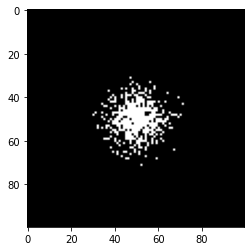

In [ ]:
# 연습문제의 데이터를 생성하고 시각화해보세요

이제 우리가 분석할 데이터를 시각적으로 확인해 보았으니 이제 이를 구성할 x, y를 만들어본다.  언뜻 생각하면 x1, x2 의 조합으로 위의 이미지도 생성했으니 간단히 이들 조합을 만들 수 있을 듯 하지만 이 과정은 생각보다 난이도가 있다. 

### x,y 조합 값 생성 

요컨데 [1,2] [3,4] 인 작은 두 배열로부터 [1,3][1,4][2,3][2,4] 이렇게 4 x 2 인 배열을 구성하는 방법이 필요하며 위의 문제의 x1,x2 경우 10000 x 2 인 배열이 나와야 한다. 이 과정을 [1,2][3,4] 배열을 통해 설명해보도록 하겠다. 

In [ ]:
a,b = np.array([1,2]), np.array([3,4])



먼저 
```
세로값 배열:
[[1,1]
 [2,2]]

가로값 배열
[[3,4]
 [3,4]]
```
이렇게 두 배열이 필요하다.  이를 만드는 방법은 

```

# [[1,1],[1,1]] 대신 np.full((2,2),1)을 사용해도 된다. 

a,b = np.array([1,2]), np.array([3,4])
m1 = np.array([[1,1],[1,1]]) * a.reshape(-1,1)
m2 = np.array([[1,1],[1,1]]) * b
```
이렇게 만들 수 있으나 이를 간단히 해주는 함수로 meshgrid 라는 함수가 존재한다. 




In [ ]:
m1,m2 = np.meshgrid(a,b)
print(m1)
print(m2)


이를 1차원으로 바꾸면 다음과 같다. 


In [ ]:
print(m1.reshape(-1), m2.reshape(-1))

이제 위 두 배열을 합치기 위해 두배열을 1차원으로 변환 후에 np._c 를 사용해 합쳐보도록 하겠다. 



In [ ]:
print( np.c_[m1.reshape(-1), m2.reshape(-1)])

결국 x1,x2 의 조합 x를 만드는 과정을 간략화하면 다음과 같다. 
```
m1,m2 = np.meshgrid(x1,x2)
x = np.c_[m1,reshape(-1), m2.reshape(-1)]
```
이제 이를 이용해 위의 x1, x2 로부터 10000 개의 x1 , x2 의 조합을 만들어보도록 하겠다. 

In [ ]:
n = 1
m1,m2 = np.meshgrid(x1,x2)
x =  np.c_[m1.reshape(-1), m2.reshape(-1)]
print(x.shape)



### y 값 만들기
이제 위에서 만든 r 값과 x 를  비교해 y 값을 만들어 보자. 현재 r 은 2차원구조이므로 이를 1차원으로 reshape 해서 비교함으로서 y값을 얻을 수 있다. 

In [ ]:
y = np.where( x[:,0] + x[:,1]  < r.reshape(-1), 1, 0 )
print(y.shape)



이제 이를 회귀분석한 후에 결정계수값을 보도록 하겠다. 

In [ ]:
regr.fit(x,y)
print( regr.score(x,y) )

### 예측값 시각화

이번에는 predict 를 통해 y 값을 예측한 결과를 이미지화시켜보도록 한다. 이때 예측된 y 는 1차원 배열이지만 순서는 2차원 배열을 1차원화시킨 형태이므로 이를 다시 2차원으로 변환해주면 x1,x2 에 대응되는 y값을 이미지화 시킬 수 있다. 



In [ ]:
pre = regr.predict(x)

plt.imshow(pre.reshape(100,100), cmap = 'gray')

### <font color = 'red'> 연습 : 두개의 변수 회귀분석
아래의 이미지는 다음과 같은 규칙으로 생성된 0~99 의 x1, x2 를 시각화 한 것이다. 이를 위한 데이터를 생성하고 이에 대해 로지스틱 회귀분석을 수행하고 그 예측값을 시각화해보자. 
</font>

```
평균 100 , 편차 10 인 랜덤값 > 2*x1 - x2 일경우 1 , 아니면 0 
```
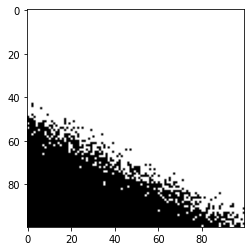


In [ ]:
x1 = np.arange(100).reshape(-1,1)
x2 = np.arange(100)

r = np.random.normal(100,10,10000).reshape(100,100)
img = np.where( r > 2 * x1 - x2 , 1, 0 ) 
plt.imshow(img, cmap = 'gray')
